[array([[-1.13511957e-01, -2.48399769e-03, -7.99909240e-02,
         1.15397172e-01, -1.48870080e-02, -1.22852836e-01,
         9.64447404e-02,  9.33163723e-02],
       [-2.27548866e-01,  2.00621515e-01, -1.62919906e-01,
         2.11560045e-01, -1.56424055e-01, -3.32289097e-02,
        -1.11297638e-01, -9.96570541e-03],
       [-3.44935252e-02, -3.49958281e-02, -1.57070246e-01,
         8.47498313e-02, -8.40685143e-02,  6.72070640e-02,
        -1.28149260e-02,  1.56701088e-01],
       [-2.14739063e-01,  1.35149537e-02,  9.99125182e-02,
        -1.95129271e-01,  3.83634965e-02,  2.04476580e-01,
        -7.29430994e-02,  1.21111639e-01],
       [-1.19256335e-01, -1.56742898e-01,  1.61141431e-01,
        -1.53947414e-01, -1.12180229e-02, -3.56382180e-02,
         6.62749763e-02,  9.23144010e-02],
       [-1.66862846e-01, -5.23011732e-03,  1.73652967e-01,
        -2.73315308e-01, -9.14725285e-02,  1.50942529e-01,
        -1.31608844e-02,  1.20871241e-03],
       [-1.75241343e-01, -4.10750

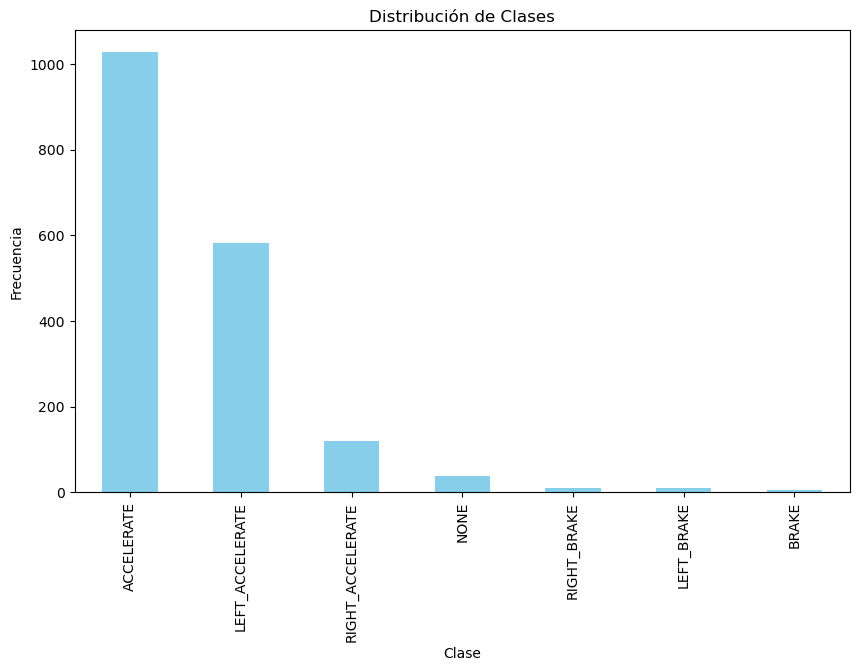

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from ann import costL2, backprop, forwardprop, iterateThetas

from Utils import ExportAllformatsMLPSKlearn

# EJERCICIO 2 - visualiza los datos

# Cargar los datos desde el archivo CSV
data = pd.read_csv("data/TrainData.csv", header=None, names=["dist1", "dist2", "dist3", "dist4", "dist5", 
                                                           "x", "y", "z", "tiempo", "accion"])

# Visualizar la distribución de clases
class_distribution = data["accion"].value_counts()

# Graficar la distribución de clases
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
#plt.show()


# EJERCICIO 3 - Limpia el dataset

# Eliminar las columnas de posición y tiempo ya que consideramos que no son tan relevantes como la distancia de los raycast
cleanDataset = data.drop(["y", "tiempo"], axis=1)
numInputs = 7

# Realizar one-hot encoding para la columna "accion"
one_hot_encoded = pd.get_dummies(data["accion"], prefix="accion")

# Añadir los valores generados del one_hot_encoded al dataset
cleanDataset = pd.concat([cleanDataset, one_hot_encoded], axis=1)
cleanDataset = cleanDataset.drop(["accion"], axis=1)
# EJERCICIO 4 - Prueba diferentes modelos de Machine Learning


# Entrenar modelo con backpropagation

# Utilizaremos los valores de las distancias de los 5 raycast como input
X = cleanDataset.iloc[:, :numInputs]
# Mientras que utilizaremos los 7 estados de accion, pasados por one_hot_encoded
Y = cleanDataset.iloc[:, numInputs:]

#==Normalizacion
from sklearn.preprocessing import StandardScaler

scaling=StandardScaler()
scaling.fit(X)
X=scaling.transform(X)


neuronsInputLayer = X.shape[1]
neuronsFirstHiddenLayer = 100
neuronsOutputLayer = Y.shape[1]

e = 0.12
iterations = 100
myAlpha = .5
myLambda = 1

# Valores aleatorios en theta1 y theta2
theta1 = np.random.uniform(low=-e, high=e, size=( neuronsFirstHiddenLayer, neuronsInputLayer+1))
theta2 = np.random.uniform(low=-e, high=e, size=(neuronsOutputLayer, neuronsFirstHiddenLayer+1))
#theta3 = np.random.uniform(low=-e, high=e, size=(99, +1))
#theta4 = np.random.uniform(low=-e, high=e, size=(99, +1))

## Ajustar thetha1 y theta2 teniendo en cuenta los parametros dados
#thetas = iterateThetas([theta1, theta2], X, Y, iterations, myLambda, myAlpha)


#########################################################
####### Compara los resultados con SKLearn ##############
#########################################################

# Entrenar a SKLearn con los mismos valores
from sklearn.neural_network import MLPClassifier
hidden_layer_sizes = (neuronsFirstHiddenLayer)
sklearn_neural_network = MLPClassifier(
    alpha=myLambda, 
    learning_rate_init=myAlpha, 
    activation='logistic',
    hidden_layer_sizes=hidden_layer_sizes,
    max_iter = iterations
)
sklearn_neural_network.fit(X, Y)


# Ajustar thetha1 y theta2 teniendo en cuenta los parametros dados
thetas = iterateThetas([theta1, theta2], X, Y, iterations, myLambda, myAlpha)

#=======================Cargar / preparar datos de test=============================
data_test = pd.read_csv("data/TestData.csv", header=None, names=["dist1", "dist2", "dist3", "dist4", "dist5", 
                                                           "x", "y", "z", "tiempo", "accion"])

class_distribution_test = data_test["accion"].value_counts()

cleanDataset_test = data_test.drop(["y", "tiempo"], axis=1)

one_hot_encoded_test = pd.get_dummies(data_test["accion"], prefix="accion")

cleanDataset_test = pd.concat([cleanDataset_test, one_hot_encoded_test], axis=1)
cleanDataset_test = cleanDataset_test.drop(["accion"], axis=1)

X_test = cleanDataset_test.iloc[:, :numInputs]
Y_test = cleanDataset_test.iloc[:, numInputs:]

#==Normalizacion
from sklearn.preprocessing import StandardScaler

scaling=StandardScaler()
scaling.fit(X_test)
X_test=scaling.transform(X_test)
#====================================================================================

## Realizar la propagación hacia adelante

# Predicciones con MLPClassifier
#layerValues_sklearn = sklearn_neural_network.predict(X_test)
#sklearnPredictions = np.argmax(layerValues_sklearn, axis=1)
#print("SklearnPredictions:", sklearnPredictions[:1000])

picklefileName = "modelo.pickle"
onixFileName = "modelo.onnx"
jsonFileName = 'modelo.json'
customFileName = 'modelo_custom.txt'

# ExportAllformatsMLPSKlearn(thetas, X, picklefileName, onixFileName, jsonFileName, customFileName)

layerValues, weighted_inputs = forwardprop(thetas, X_test)
myPredictions = np.argmax(layerValues[-1], axis=1)

YTest_Values = np.argmax(Y_test, axis=1)

print("MyPredictions.shape: ", myPredictions.shape)
print("YTest_Values.shape: ", YTest_Values.shape)
print("MyPredictions:", myPredictions[:549])
print("YTest_Values:", YTest_Values[:549])

myAccuracy_booleans = myPredictions == YTest_Values
myAccuracy = np.mean(myAccuracy_booleans) * 100
print("Our accuracy : ", myAccuracy, "%")

#layerValues, weighted_inputs = forwardprop(thetas, X)
#myPredictions = np.argmax(layerValues[-1], axis=1)
#
#YTest_Predictions = np.argmax(Y_test, axis=1)
#myAccuracy_booleans = myPredictions == sklearnPredictions
#myAccuracy = np.mean(myAccuracy_booleans) * 100
#print("SKL accuracy : ", myAccuracy, "%")

## Tener las predicciones mas probables en "predictions"
#predictions = np.argmax(layerValues[-1], axis=1)
#totalCases = len(y_index_numeric)
##Numero de veces que se ha acertado el valor
#correctCases = np.sum(predictions == y_index_numeric)
#accuracy = correctCases / totalCases

##print("predictions:", predictions[:-1000])
#print("Accuracy : ", accuracy)

